In [1]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["recipe_recommendation"]

In [3]:
# Define the collection names
users_collection = db["users"]
recipes_collection = db["recipes"]

In [4]:
# Load the data from MongoDB collections into Pandas DataFrames
users_df = pd.DataFrame(list(users_collection.find()))
recipes_df = pd.DataFrame(list(recipes_collection.find()))

In [5]:
# Print the first few rows of the DataFrames to verify the data has been loaded successfully
print("Users Data:")
print(users_df.head())

Users Data:
                        _id  user_id  recipe_id        date  rating   u  \
0  6548b1310a220dda46ec1bff   628951      82783  2007-11-13     2.0  45   
1  6548b1310a220dda46ec1c00    56680     126118  2006-10-07     4.0  16   
2  6548b1310a220dda46ec1c01   176615     118119  2006-10-27     0.0  82   
3  6548b1310a220dda46ec1c02    56112     166712  2007-08-02     5.0  89   
4  6548b1310a220dda46ec1c03   537179      78641  2009-11-20     4.0  91   

        i  
0  172637  
1  177847  
2  178250  
3  177821  
4  177805  


In [6]:
print("\nRecipes Data:")
print(recipes_df.head())


Recipes Data:
                        _id                                        name  \
0  6548b0fb0da95b52a29639ec  arriba   baked winter squash mexican style   
1  6548b0fb0da95b52a29639ed                    bananas 4 ice cream  pie   
2  6548b0fb0da95b52a29639ee            a bit different  breakfast pizza   
3  6548b0fb0da95b52a29639ef                 berry  good sandwich spread   
4  6548b0fb0da95b52a29639f0          amish  tomato ketchup  for canning   

       id  minutes  contributor_id   submitted  \
0  137739       55           47892  2005-09-16   
1   70971      180          102353  2003-09-10   
2   31490       30           26278  2002-06-17   
3  109439        5           49168  2005-01-25   
4   44061      190           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['weeknight', 'time-to-make', 'course', 'main-...   
2  ['30-minutes-or-less', 'time-to-make', 'course...   
3  ['15-m

Data Preprocessing and Feature Engineering

In [7]:
print(recipes_df.columns)

Index(['_id', 'name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')


In [8]:
recipes_df.drop(columns=['description', '_id','contributor_id','submitted'], inplace=True)


In [9]:
print("\nRecipes Data:")
print(recipes_df.head())


Recipes Data:
                                         name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1                    bananas 4 ice cream  pie   70971      180   
2            a bit different  breakfast pizza   31490       30   
3                 berry  good sandwich spread  109439        5   
4          amish  tomato ketchup  for canning   44061      190   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['weeknight', 'time-to-make', 'course', 'main-...   
2  ['30-minutes-or-less', 'time-to-make', 'course...   
3  ['15-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                           nutrition  n_steps  \
0              [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1  [4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...        8   
2          [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]    

In [10]:
print(users_df.columns)

Index(['_id', 'user_id', 'recipe_id', 'date', 'rating', 'u', 'i'], dtype='object')


In [11]:
users_df.drop(columns='_id', inplace=True)

In [12]:
# Check for and handle missing values, if any
recipes_df.dropna(inplace=True)  # Remove rows with missing values

In [13]:
# Further preprocessing for tags, nutrition, and ingredients columns
# Example: Convert tags, ingredients to a list of strings
recipes_df['tags'] = recipes_df['tags'].apply(eval)  # Convert string representation to a list
recipes_df['ingredients'] = recipes_df['ingredients'].apply(eval)  # Convert string representation to a list

In [14]:
# Users Data Preprocessing
# Check for and handle missing values, if any
users_df.dropna(inplace=True)  # Remove rows with missing values

In [15]:
# Example: Convert date column to a datetime data type
users_df['date'] = pd.to_datetime(users_df['date'])


In [16]:
import seaborn as sns

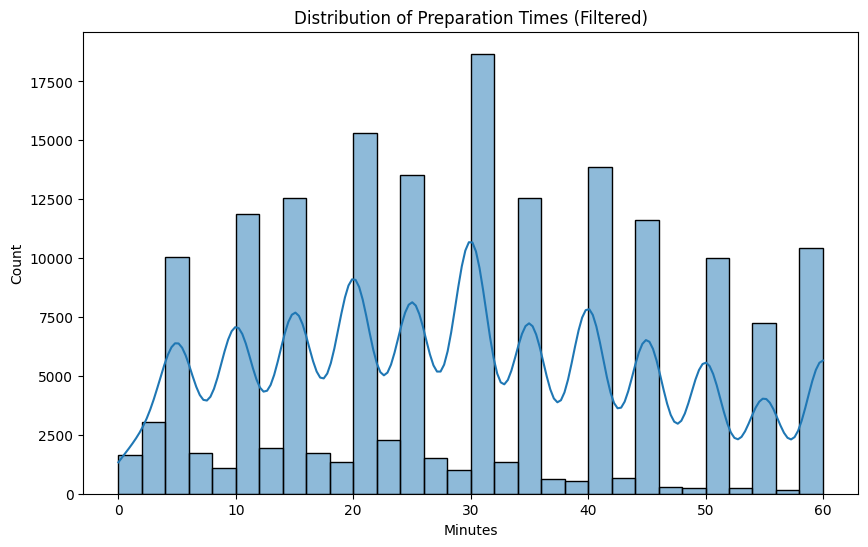

In [17]:
# Check for outliers
outliers = recipes_df[recipes_df['minutes'] > 60]  

# Filter out outliers
filtered_recipes_df = recipes_df[recipes_df['minutes'] <= 60]

# Visualize the distribution of preparation times for the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_recipes_df['minutes'], bins=30, kde=True)
plt.title("Distribution of Preparation Times (Filtered)")
plt.xlabel("Minutes")
plt.ylabel("Count")
plt.show()

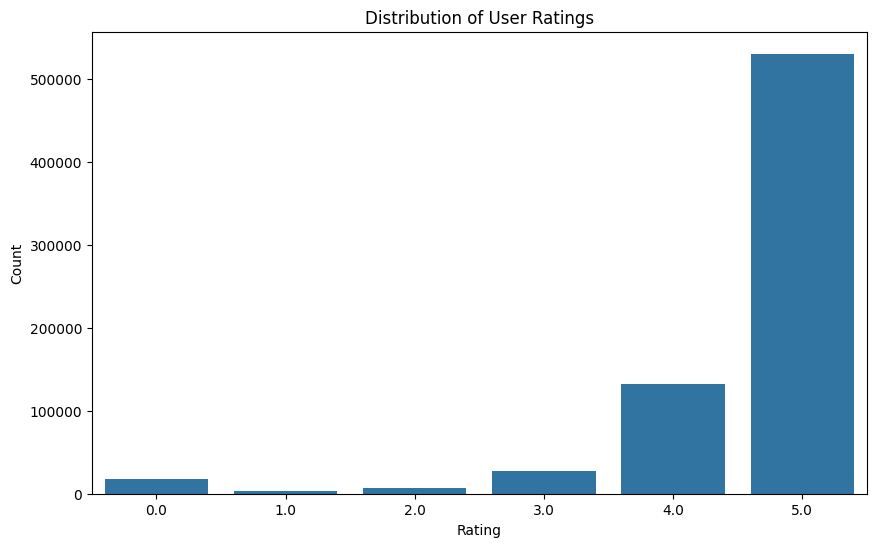

In [18]:
# Visualize the distribution of ratings from users
plt.figure(figsize=(10, 6))
sns.countplot(data=users_df, x='rating')
plt.title("Distribution of User Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

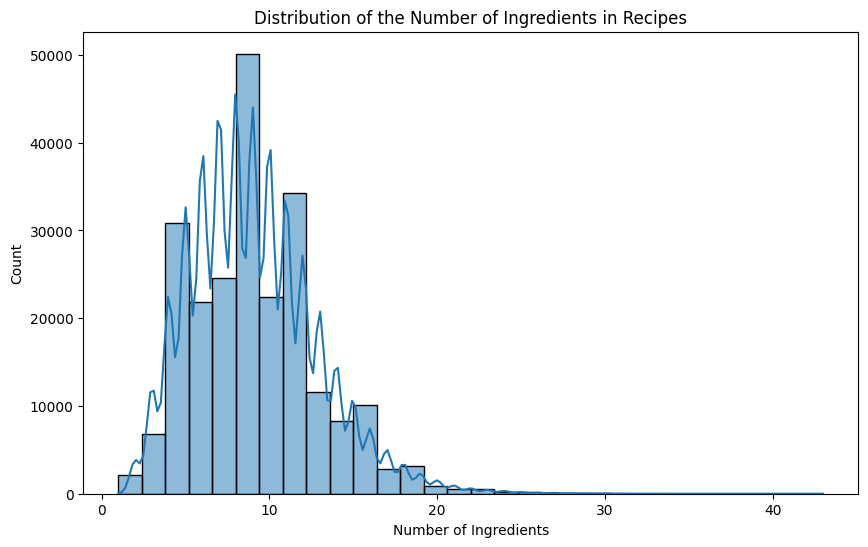

In [19]:
# Visualize the distribution of the number of ingredients in recipes
plt.figure(figsize=(10, 6))
sns.histplot(recipes_df['n_ingredients'], bins=30, kde=True)
plt.title("Distribution of the Number of Ingredients in Recipes")
plt.xlabel("Number of Ingredients")
plt.ylabel("Count")
plt.show()

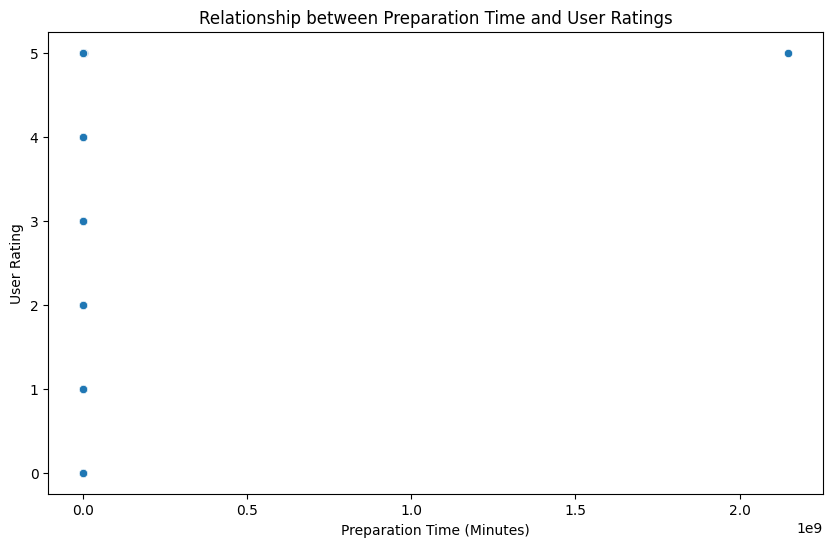

In [20]:
#Explore the relationship between preparation time (minutes) and user ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recipes_df, x='minutes', y=users_df['rating'])
plt.title("Relationship between Preparation Time and User Ratings")
plt.xlabel("Preparation Time (Minutes)")
plt.ylabel("User Rating")
plt.show()

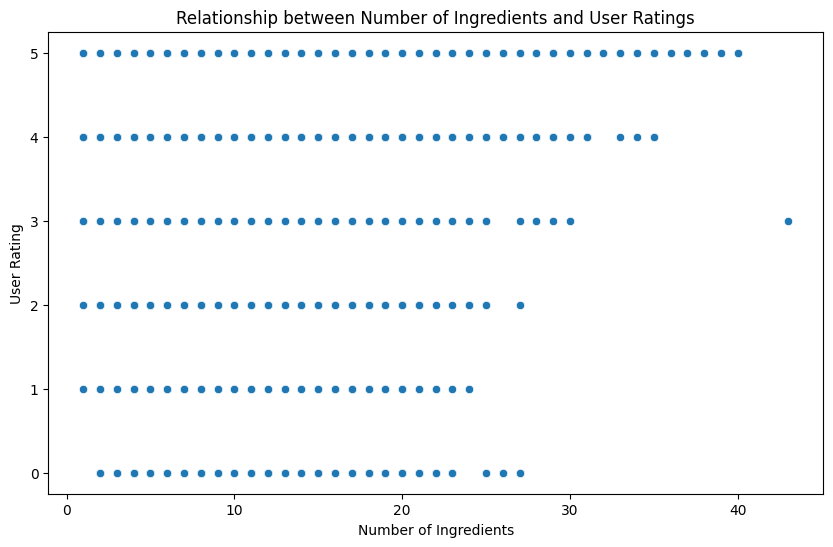

In [21]:
# Explore the relationship between the number of ingredients and user ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recipes_df, x='n_ingredients', y=users_df['rating'])
plt.title("Relationship between Number of Ingredients and User Ratings")
plt.xlabel("Number of Ingredients")
plt.ylabel("User Rating")
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# Filter users with a minimum number of interactions
min_user_interactions = 10  # Adjust as needed
user_interactions = users_df['user_id'].value_counts()
valid_users = user_interactions[user_interactions >= min_user_interactions].index

# Filter items (recipes) with a minimum number of interactions
min_item_interactions = 5  # Adjust as needed
item_interactions = users_df['recipe_id'].value_counts()
valid_items = item_interactions[item_interactions >= min_item_interactions].index

# Filter the original users_df based on valid users and items
filtered_users_df = users_df[(users_df['user_id'].isin(valid_users)) & (users_df['recipe_id'].isin(valid_items))]

# Create the user-item interaction matrix
user_item_matrix = filtered_users_df.pivot(index='user_id', columns='recipe_id', values='rating')
user_item_matrix.fillna(0, inplace=True)


In [24]:
# Content-Based Filtering: TF-IDF Vectorization for 'tags' and 'ingredients'
tfidf = TfidfVectorizer(stop_words='english')

In [25]:
# Combine 'tags' and 'ingredients' into a single text column
recipes_df['combined_text'] = recipes_df['tags'] + recipes_df['ingredients']
recipes_df['combined_text'] = recipes_df['combined_text'].apply(lambda x: ' '.join(x))

# Apply TF-IDF to the combined text column
recipes_df['tfidf_combined'] = list(tfidf.fit_transform(recipes_df['combined_text']).toarray())

# Drop the temporary combined text column if no longer needed
recipes_df.drop(columns=['combined_text'], inplace=True)


In [26]:
# Print user-item matrix and TF-IDF representations for 'tags' and 'ingredients'
print("User-Item Interaction Matrix:")
print(user_item_matrix.head())

print("\nSample TF-IDF representation for 'tags' and 'ingredients:")
print(recipes_df[['name', 'tfidf_combined']].head())


User-Item Interaction Matrix:
recipe_id  40      49      58      62      66      92      93      112     \
user_id                                                                     
1533          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1535          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1634          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1676          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1792          0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

recipe_id  142     143     ...  518078  518143  518229  519802  522871  \
user_id                    ...                                           
1533          0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
1535          0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
1634          0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
1676          0.0     0.0  ...     0.0     0.0     0.0     0

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

In [28]:
# Data Splitting
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)


In [29]:
# Collaborative Filtering Model (Matrix Factorization using SVD)
from scipy.sparse.linalg import svds


In [30]:
# SVD-based collaborative filtering
def collaborative_filtering_svd(train_matrix, k=50):
    U, sigma, Vt = svds(train_matrix, k=k)
    sigma_diag_matrix = np.diag(sigma)
    predicted_ratings = np.dot(np.dot(U, sigma_diag_matrix), Vt)
    return predicted_ratings

# Set the number of latent factors (k) for the SVD
k = 50

In [31]:
from scipy.sparse import csr_matrix

# Convert train_data to a sparse matrix
train_matrix_sparse = csr_matrix(train_data)

# Now, use train_matrix_sparse for collaborative filtering with SVD
predicted_ratings = collaborative_filtering_svd(train_matrix_sparse, k)


In [32]:
from math import sqrt
import numpy as np

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))


In [33]:
import numpy as np

# Calculate RMSE
collaborative_filtering_rmse = rmse(predicted_ratings, test_data.to_numpy())

print(f"Collaborative Filtering RMSE: {collaborative_filtering_rmse}")



Collaborative Filtering RMSE: 4.75186801927282


An RMSE (Root Mean Square Error) of 4.75 is relatively high, indicating that the collaborative filtering model has a considerable prediction error on the test data. In the context of a recommendation system, a lower RMSE is generally preferred, as it indicates better prediction accuracy.



One way to potentially improve the recommendation system's performance is to implement a hybrid model that combines collaborative and content-based filtering.

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to get top N similar recipes based on content
def get_top_similar_recipes(recipe_id, N=10):
    # Calculate cosine similarity between the given recipe and all recipes
    recipe_idx = recipes_df[recipes_df['id'] == recipe_id].index[0]
    
    # Convert tfidf_combined to a NumPy array
    tfidf_combined_np = np.array(list(recipes_df['tfidf_combined']))
    
    similarities = cosine_similarity([tfidf_combined_np[recipe_idx]], tfidf_combined_np)
    
    # Get the indices of top N similar recipes (excluding the recipe itself)
    similar_recipe_indices = similarities.argsort()[0][-2:-(N+2):-1]
    
    # Get the recipe IDs of the top N similar recipes
    similar_recipe_ids = recipes_df.iloc[similar_recipe_indices]['id'].tolist()
    
    return similar_recipe_ids


In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [36]:
# Create a smaller data subset for testing
# Example: Select the first 100 users and their interactions
small_users_df = users_df.head(100)
small_recipes_df = recipes_df 

In [37]:
# Function to get personalized recommendations for a user using Annoy
def get_personalized_recommendations(user_id, N=10):
    # Initialize a dictionary to store recipe recommendations and their scores
    recipe_scores = {}

    # Get the top N most recently rated recipes by the user
    user_rated_recipes = small_users_df[small_users_df['user_id'] == user_id]['recipe_id'].tolist()[:10]

    # For each recipe the user has rated, find similar recipes based on content using Annoy
    for recipe_id in user_rated_recipes:
        similar_recipes = get_top_similar_recipes(recipe_id, N)  # Use the correct function here

        # Update recipe scores
        for recipe in similar_recipes:
            if recipe not in user_rated_recipes:
                if recipe in recipe_scores:
                    recipe_scores[recipe] += 1  # You can customize the scoring logic
                else:
                    recipe_scores[recipe] = 1

    # Sort recipes by their scores in descending order
    sorted_recipes = sorted(recipe_scores.items(), key=lambda x: x[1], reverse=True)

    # Get the top N recommended recipes
    top_recommendations = [recipe_id for recipe_id, score in sorted_recipes[:N]]

    return top_recommendations


In [38]:
# Example: Get personalized recommendations for a user using Annoy
user_id = 8937  
recommended_recipes = get_personalized_recommendations(user_id, N=10)

print("Recommended Recipes for User", user_id, ":")
for recipe_id in recommended_recipes:
    recipe_name = small_recipes_df[small_recipes_df['id'] == recipe_id]['name'].values[0]
    print(recipe_name)


Recommended Recipes for User 8937 :
shirley s fudge
wedding cake fudge
black walnut fudge
swedish toffee
layered strawberry jell o salad
aunt bill s brown candy
swedish hard candy
fondue for strawberries
stuffed french toast with strawberry sauce
strawberry cheesecake ice cream  for electric ice cream machine


In [39]:
# Function to get recipe details for a list of recipe IDs
def get_recipe_details(recipe_ids):
    recipe_details = []

    for recipe_id in recipe_ids:
        # Retrieve recipe details from your recipes_df DataFrame
        recipe_info = recipes_df[recipes_df['id'] == recipe_id]
        
        if not recipe_info.empty:
            # Extract relevant information (modify this based on your DataFrame structure)
            recipe_name = recipe_info['name'].values[0]
            recipe_ingredients = recipe_info['ingredients'].values[0]
            recipe_steps = recipe_info['steps'].values[0]

            # Create a dictionary with recipe details
            recipe_detail = {
                'name': recipe_name,
                'ingredients': recipe_ingredients,
                'steps': recipe_steps,
            }
            recipe_details.append(recipe_detail)

    return recipe_details


In [40]:
user_id = 8937
recommended_recipes = get_personalized_recommendations(user_id, N=10)

# Get details for recommended recipes
recommended_details = get_recipe_details(recommended_recipes)

# Display the details of recommended recipes
for recipe_detail in recommended_details:
    print("Recipe Name:", recipe_detail['name'])
    print("Ingredients:", recipe_detail['ingredients'])
    print("Steps:", recipe_detail['steps'])
    print("\n")


Recipe Name: shirley s fudge
Ingredients: ['cocoa', 'sugar', 'half-and-half cream', 'butter', 'white corn syrup', 'salt', 'vanilla']
Steps: ['in a medium saucepan , combine cocoa , sugar , cream , butter corn syrup and salt', 'bring to a full rolling boil , stirring contantly', 'boil for 1 minute', 'remove from heat and add vanilla , beat until thick and creamy', 'when beater marks on side of pan and holds its shape , stop beating', 'add any additional items if desired', 'stir and pour into buttered dish , let cool']


Recipe Name: wedding cake fudge
Ingredients: ['unsalted butter', 'sugar', 'half-and-half', 'whole milk', 'corn syrup', 'vanilla extract', 'salt']
Steps: ['prepare a 2 quart sauce pan using a non-stick vegetable spray', 'combine sugar , milk , cream , syrup and salt in sauce pan and cook at medium heat until it boils', 'stir gently and continue to boil at lowest heat until boiling temperature reaches 236-238 degrees f', 'remove from heat and add butter , stir gently , the

In [70]:
import numpy as np

# Function to get hybrid recommendations for a user using weighted average
def get_hybrid_recommendations(user_id, N=10, alpha=0.5):
    # Collaborative Filtering Recommendations
    collaborative_ratings = get_collaborative_recommendations(user_id, N)
    
    # Content-Based Filtering Recommendations
    # Calculate cosine similarity between the user's preferences (TF-IDF) and all recipes
    user_idx = filtered_users_df[filtered_users_df['user_id'] == user_id].index[0]
    user_profile = user_item_matrix[user_idx]
    content_similarities = cosine_similarity([user_profile], recipes_df['tfidf_combined'].tolist())[0]
    
    top_content_indices = content_similarities.argsort()[-N:][::-1]
    content_recipes = recipes_df.iloc[top_content_indices]['id'].tolist()
    
    # Combine Collaborative and Content-Based Recommendations using weighted average
    hybrid_recommendations = []
    for i in range(N):
        combined_recipe = collaborative_ratings[i] * (1 - alpha) + content_recipes[i] * alpha
        hybrid_recommendations.append(combined_recipe)
    
    return hybrid_recommendations
